### Assignment 1

#### Image classification (CIFAR-10 dataset)

#### Data preparation

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle.

In [1]:
from data_preprocessing_utils import unpickle_file

# specify the file path of a specific batch
file = "cifar-10-python/data_batch_1"

batch_data = unpickle_file(file)

In [2]:
# The keys in the dictionary are byte strings (bytes) rather than standard strings. In Python, a byte string is prefixed with b, like b'batch_label'
print(list(batch_data.keys()))

# Convert the byte strings to standard strings
keys = [key.decode("utf-8") for key in batch_data.keys()]
print(keys)

# Update the keys in the dictionary with the standard strings
batch_data = {key.decode("utf-8"): value for key, value in batch_data.items()}

[b'batch_label', b'labels', b'data', b'filenames']
['batch_label', 'labels', 'data', 'filenames']


Data is a 10000x3072 numpy array of uint8s. 
Each row of the array stores a 32x32 colour image. 
The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.

In [3]:
print(batch_data["data"].shape)
print(type(batch_data["data"]))

print(batch_data["data"][0].shape)
print(type(batch_data["data"][0][0]))

print(batch_data["labels"][0:10])
print(batch_data["filenames"][0:10])

(10000, 3072)
<class 'numpy.ndarray'>
(3072,)
<class 'numpy.uint8'>
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
[b'leptodactylus_pentadactylus_s_000004.png', b'camion_s_000148.png', b'tipper_truck_s_001250.png', b'american_elk_s_001521.png', b'station_wagon_s_000293.png', b'coupe_s_001735.png', b'cassowary_s_001300.png', b'cow_pony_s_001168.png', b'sea_boat_s_001584.png', b'tabby_s_001355.png']


In [4]:
images = [img_path.decode("utf-8") for img_path in batch_data["filenames"]]
print(images[0:10])

['leptodactylus_pentadactylus_s_000004.png', 'camion_s_000148.png', 'tipper_truck_s_001250.png', 'american_elk_s_001521.png', 'station_wagon_s_000293.png', 'coupe_s_001735.png', 'cassowary_s_001300.png', 'cow_pony_s_001168.png', 'sea_boat_s_001584.png', 'tabby_s_001355.png']


Below we can preview 5 random images from our batch

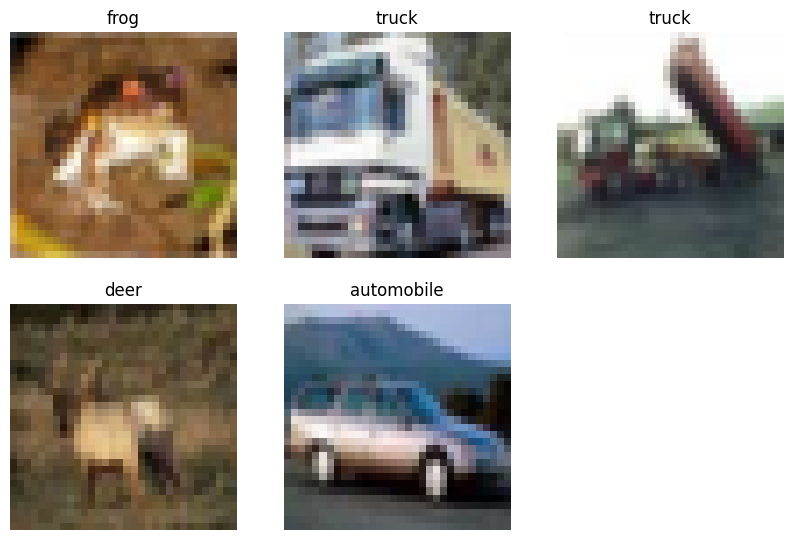

In [5]:
from data_preprocessing_utils import display_images
from data_preprocessing_utils import preprocess_images

# Extract data and labels
images = batch_data["data"]
labels = batch_data["labels"]

# TODO: Analyze this function
images_normalized = preprocess_images(images)

# CIFAR-10 class names
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

# Display images
display_images(images_normalized, labels, class_names, num_images=5)

Load all the dataset

In [6]:
from data_preprocessing_utils import load_cifar10_data

data_dir = "./cifar-10-python"

x_train, y_train, x_test, y_test = load_cifar10_data(data_dir)

print("x_train.shape =", x_train.shape)
print(type(x_train[0]))
print(type(x_train[0][0]))

print("y_train.shape =", y_train.shape)
print(type(y_train[0]))

print("x_test.shape =", x_test.shape)
print(type(x_test[0]))
print(type(x_test[0][0]))


print("y_test.shape =", y_test.shape)
print(type(y_test[0]))


x_train.shape = (50000, 3072)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
y_train.shape = (50000,)
<class 'numpy.int64'>
x_test.shape = (10000, 3072)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
y_test.shape = (10000,)
<class 'numpy.int64'>


Preprocess the training & testing data

In [7]:
from data_preprocessing_utils import normalize_data

# Normalize the data without reshaping
x_train_normalized = normalize_data(x_train)
x_test_normalized = normalize_data(x_test)

print("Normalized data shape:", x_train_normalized.shape)
print("First pixel value before normalization:", x_train[0, 0])
print("First pixel value after normalization:", x_train_normalized[0, 0])

Normalized data shape: (50000, 3072)
First pixel value before normalization: 59
First pixel value after normalization: 0.23137255


class distribution

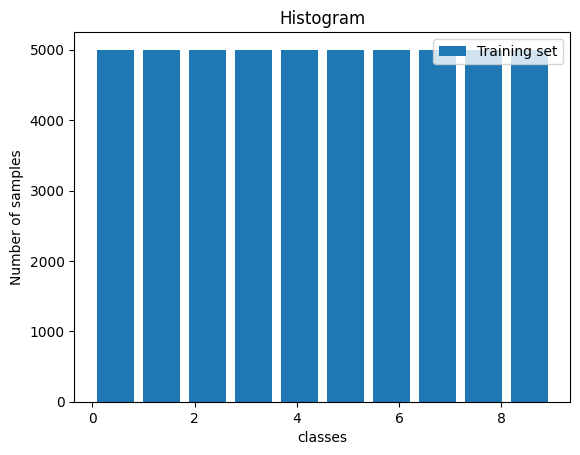

In [8]:
from data_preprocessing_utils import display_training_class_distribution

display_training_class_distribution(y_train)

In order to do a 10-class classification problem, i need to create 10 one-vs-all SVMs (for my custom implementation). 
Sklearn does it automatically. 
So, for my implementation I'm going to create a binary classification problem ONLY for a specific class and I'm goind to compare the results with sklearn's SVM.

This notebook analyzes the binary classification problem

In [9]:
# Select 100 Samples from Each Class
import numpy as np

train_selected_indices = []
test_selected_indices = []

train_target_class_indices = np.where(y_train == 0)[0][0:1000]
test_target_class_indices = np.where(y_test == 0)[0][0:1000]


# Loop over each class label (1 to 9)
for label in range(1, 10):
    # Find the indices of all samples with this label
    train_label_indices = np.where(y_train == label)[0]
    test_label_indices = np.where(y_test == label)[0]

    # Randomly select 100 samples from these indices
    train_selected_label_indices = np.random.choice(
        train_label_indices, size=100, replace=False
    )
    test_selected_label_indices = np.random.choice(
        test_label_indices, size=100, replace=False
    )

    # Add these indices to the list
    train_selected_indices.extend(train_selected_label_indices)
    test_selected_indices.extend(test_selected_label_indices)

In [10]:
# Convert Selected Indices to a Numpy Array and Shuffle

# Convert the list to a numpy array
train_selected_indices = np.array(train_selected_indices)
test_selected_indices = np.array(test_selected_indices)

# Shuffle the indices to mix samples from different classes
np.random.shuffle(train_selected_indices)
np.random.shuffle(test_selected_indices)

In [11]:
# Subset the data

x_train_subset_1 = x_train_normalized[train_target_class_indices]
x_train_subset_2 = x_train_normalized[train_selected_indices]
x_test_subset_1 = x_train_normalized[test_target_class_indices]
x_test_subset_2 = x_train_normalized[test_selected_indices]

y_train_subset_1 = y_train[train_target_class_indices]
y_train_subset_2 = y_train[train_selected_indices]
y_test_subset_1 = y_train[test_target_class_indices]
y_test_subset_2 = y_train[test_selected_indices]

print("x_train_subset_1.shape:", x_train_subset_1.shape)
print("x_train_subset_2.shape:", x_train_subset_2.shape)
print("x_test_subset_1.shape:", x_test_subset_1.shape)
print("x_test_subset_2.shape:", x_test_subset_2.shape)

print("y_train_subset_1.shape:", y_train_subset_1.shape)
print("y_train_subset_2.shape:", y_train_subset_2.shape)
print("y_test_subset_1.shape:", y_test_subset_1.shape)
print("y_test_subset_2.shape:", y_test_subset_2.shape)


x_train_subset_1.shape: (1000, 3072)
x_train_subset_2.shape: (900, 3072)
x_test_subset_1.shape: (1000, 3072)
x_test_subset_2.shape: (900, 3072)
y_train_subset_1.shape: (1000,)
y_train_subset_2.shape: (900,)
y_test_subset_1.shape: (1000,)
y_test_subset_2.shape: (900,)


In [12]:
x_train_final = np.concatenate((x_train_subset_1, x_train_subset_2))
y_train_final = np.concatenate((y_train_subset_1, y_train_subset_2))

x_test_final = np.concatenate((x_test_subset_1, x_test_subset_2))
y_test_final = np.concatenate((y_test_subset_1, y_test_subset_2))


print("x_train_final.shape:", x_train_final.shape)
print("y_train_final.shape:", y_train_final.shape)
print("x_test_final.shape:", x_test_final.shape)
print("y_test_final.shape:", y_test_final.shape)

x_train_final.shape: (1900, 3072)
y_train_final.shape: (1900,)
x_test_final.shape: (1900, 3072)
y_test_final.shape: (1900,)


In [13]:
y_train_final = np.where(y_train_final == 1, 1, -1)
y_test_final = np.where(y_test_final == 1, 1, -1)

#### Dimensionality reduction

There is a reduction of dimensions with the PCA technique while maintaining 90% of the distribution. The dimension of the data is reduced from 3072 to 77.

In [14]:
from sklearn import decomposition
import numpy as np

# TODO: Analyze how PCA works with sklearn (the arguments and the return values)
pca = decomposition.PCA(n_components=0.9, svd_solver="full", random_state=0)
x_train_final = pca.fit_transform(x_train_final)
x_test_final = pca.transform(x_test_final)

print("x_train_final.shape =", x_train_final.shape)
print("x_test.shape =", x_test_final.shape)

x_train_final.shape = (1900, 77)
x_test.shape = (1900, 77)


#### Model evaluation

The class `MoschosSVM` aims to implement SVM training and prediction using a variety of kernel functions—linear, polynomial, radial basis function (RBF), and MLP (sigmoid)—and relies on cvxopt to solve the underlying quadratic programming (QP) problem that arises during model training. 

`grid_search` performs K-fold cross validation & evaluates for various parameter values. 

Accuracy is chosen as the evaluation metric, because the classes are weighted.

`plot_grid_search` generates plots for accuracy and training time. 

`evaluate_model` retrains the best model on the entire training set and evaluates it on the test set.

In [15]:
final_results = []

##### MoschosSVM (Linear Kernel)

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [16]:
from svm import MoschosSVM
from model_training_utils import grid_search

param_dict = {"C": (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0)}

model = MoschosSVM(kernel="linear")

results = grid_search(model, param_dict, x_train_final, y_train_final)

[1/7] {'C': 0.001}: train_acc = 0.9474, val_acc = 0.9474 | t = 24.0 sec = 0.4 min
[2/7] {'C': 0.005}: train_acc = 0.9474, val_acc = 0.9474 | t = 20.2 sec = 0.3 min
[3/7] {'C': 0.01}: train_acc = 0.9484, val_acc = 0.9474 | t = 19.2 sec = 0.3 min
[4/7] {'C': 0.05}: train_acc = 0.9622, val_acc = 0.9400 | t = 18.8 sec = 0.3 min
[5/7] {'C': 0.1}: train_acc = 0.9634, val_acc = 0.9347 | t = 21.5 sec = 0.4 min
[6/7] {'C': 0.5}: train_acc = 0.9634, val_acc = 0.9263 | t = 20.4 sec = 0.3 min
[7/7] {'C': 1.0}: train_acc = 0.9637, val_acc = 0.9253 | t = 21.2 sec = 0.4 min
Best params = {'C': 0.001}
Maximum validation accuracy = 0.9473684210526315


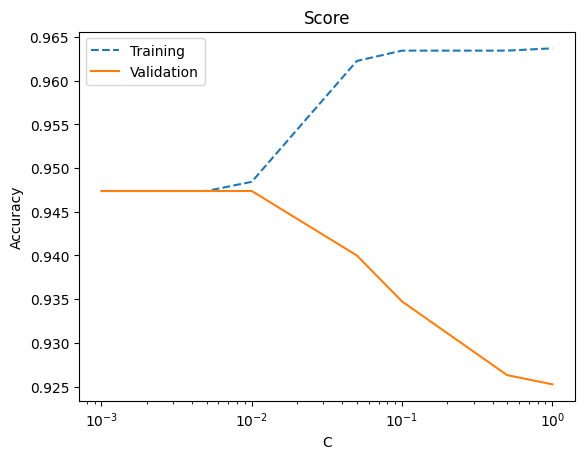

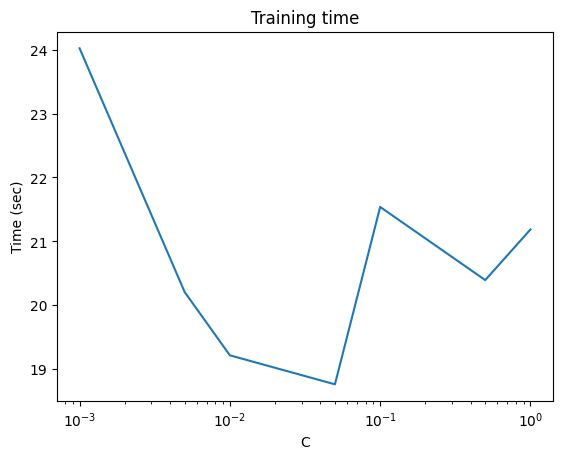

In [17]:
from model_training_utils import plot_grid_search

plot_grid_search(results, "C", None, "log")

In [18]:
from model_training_utils import evaluate_model


res = evaluate_model(
    "My Linear SVM",
    model,
    results["best_params"],
    x_train_final,
    y_train_final,
    x_test_final,
    y_test_final,
)

final_results.append(res)

Training on the original training set with params = {'C': 0.001}
Training time = 51.0 sec = 0.9 min
Training accuracy = 0.9473684210526315
Test accuracy = 0.8984210526315789


##### Sklearn (Linear Kernel)

In [19]:
from sklearn import svm

param_dict = {"C": (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0)}

model = svm.SVC(kernel="linear")
results = grid_search(model, param_dict, x_train_final, y_train_final)

[1/7] {'C': 0.001}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[2/7] {'C': 0.005}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[3/7] {'C': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[4/7] {'C': 0.05}: train_acc = 0.9497, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[5/7] {'C': 0.1}: train_acc = 0.9562, val_acc = 0.9484 | t = 0.1 sec = 0.0 min
[6/7] {'C': 0.5}: train_acc = 0.9609, val_acc = 0.9453 | t = 0.2 sec = 0.0 min
[7/7] {'C': 1.0}: train_acc = 0.9609, val_acc = 0.9453 | t = 0.4 sec = 0.0 min
Best params = {'C': 0.1}
Maximum validation accuracy = 0.948421052631579


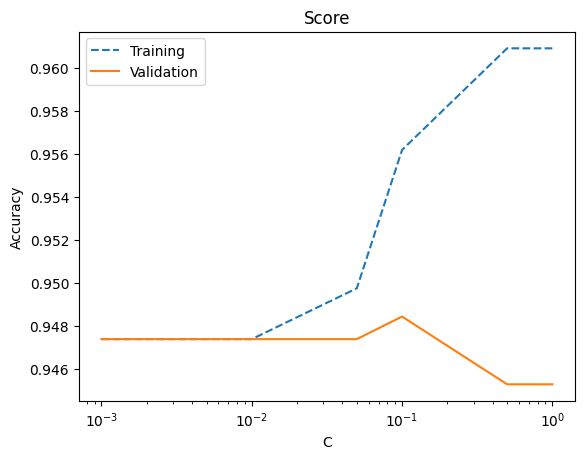

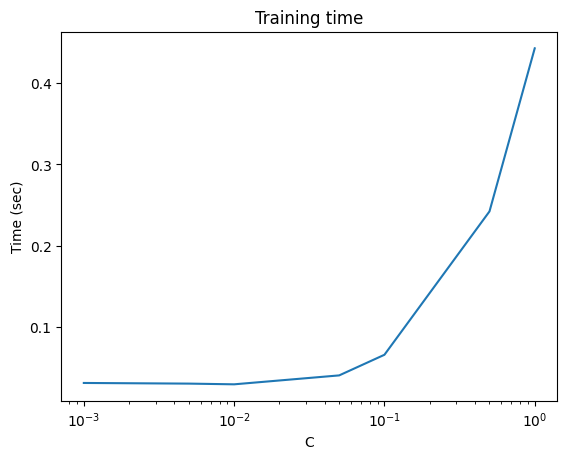

In [20]:
plot_grid_search(results, "C", None, "log")

In [21]:
res = evaluate_model(
    "Linear SVM",
    model,
    results["best_params"],
    x_train_final,
    y_train_final,
    x_test_final,
    y_test_final,
)
final_results.append(res)

Training on the original training set with params = {'C': 0.1}
Training time = 0.1 sec = 0.0 min
Training accuracy = 0.9473684210526315
Test accuracy = 0.8984210526315789


##### MoschosSVM (RBF Kernel)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = e^{-\gamma||\mathbf{x}-\mathbf{x}'||^2} $

In [22]:
param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0), "gamma": (0.01, 0.1, 1.0)}

model = MoschosSVM(kernel="rbf")
results = grid_search(model, param_dict, x_train_final, y_train_final)

[1/18] {'C': 0.001, 'gamma': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 26.0 sec = 0.4 min
[2/18] {'C': 0.001, 'gamma': 0.1}: train_acc = 0.9474, val_acc = 0.9474 | t = 37.2 sec = 0.6 min
[3/18] {'C': 0.001, 'gamma': 1.0}: train_acc = 0.9474, val_acc = 0.9474 | t = 45.0 sec = 0.7 min
[4/18] {'C': 0.01, 'gamma': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 26.3 sec = 0.4 min
[5/18] {'C': 0.01, 'gamma': 0.1}: train_acc = 0.9474, val_acc = 0.9474 | t = 43.6 sec = 0.7 min
[6/18] {'C': 0.01, 'gamma': 1.0}: train_acc = 0.9474, val_acc = 0.9474 | t = 60.5 sec = 1.0 min
[7/18] {'C': 0.1, 'gamma': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 42.0 sec = 0.7 min
[8/18] {'C': 0.1, 'gamma': 0.1}: train_acc = 0.9474, val_acc = 0.9474 | t = 59.7 sec = 1.0 min
[9/18] {'C': 0.1, 'gamma': 1.0}: train_acc = 0.9474, val_acc = 0.9474 | t = 33.6 sec = 0.6 min
[10/18] {'C': 1.0, 'gamma': 0.01}: train_acc = 0.9762, val_acc = 0.9474 | t = 21.2 sec = 0.4 min
[11/18] {'C': 1.0, 'gamma': 0.1}: tr

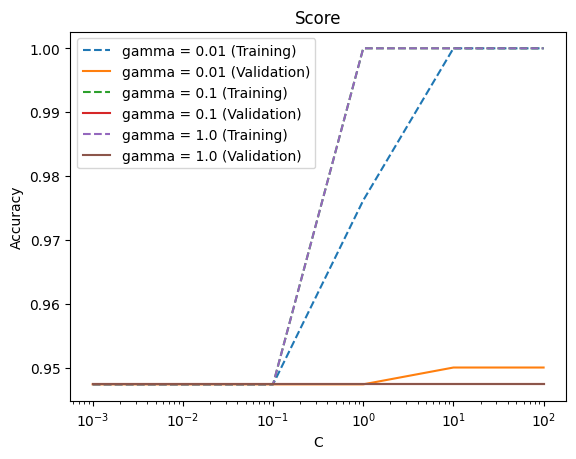

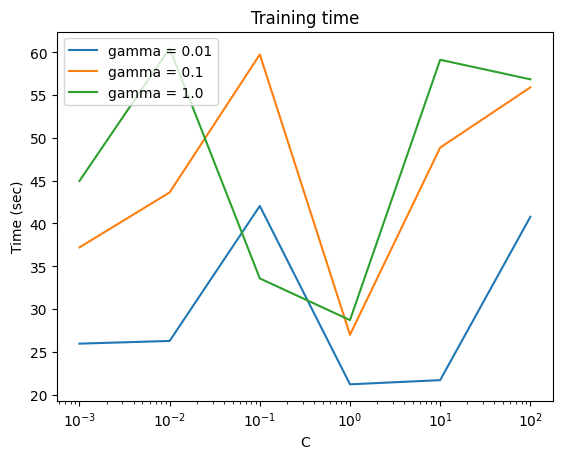

In [23]:
plot_grid_search(results, "C", "gamma", "log")

In [24]:
res = evaluate_model(
    "My RBF SVM",
    model,
    results["best_params"],
    x_train_final,
    y_train_final,
    x_test_final,
    y_test_final,
)
final_results.append(res)

Training on the original training set with params = {'C': 10.0, 'gamma': 0.01}
Training time = 42.9 sec = 0.7 min
Training accuracy = 1.0
Test accuracy = 0.9031578947368422


##### Sklearn (RBF Kernel)

In [25]:
param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0), "gamma": (0.01, 0.1, 1.0)}

model = svm.SVC(kernel="rbf")
results = grid_search(model, param_dict, x_train_final, y_train_final)

[1/18] {'C': 0.001, 'gamma': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[2/18] {'C': 0.001, 'gamma': 0.1}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[3/18] {'C': 0.001, 'gamma': 1.0}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[4/18] {'C': 0.01, 'gamma': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.1 sec = 0.0 min
[5/18] {'C': 0.01, 'gamma': 0.1}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.1 sec = 0.0 min
[6/18] {'C': 0.01, 'gamma': 1.0}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.1 sec = 0.0 min
[7/18] {'C': 0.1, 'gamma': 0.01}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[8/18] {'C': 0.1, 'gamma': 0.1}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.1 sec = 0.0 min
[9/18] {'C': 0.1, 'gamma': 1.0}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.1 sec = 0.0 min
[10/18] {'C': 1.0, 'gamma': 0.01}: train_acc = 0.9650, val_acc = 0.9474 | t = 0.1 sec = 0.0 min
[11/18] {'C': 1.0, 'gamma': 0.1}: train_acc = 

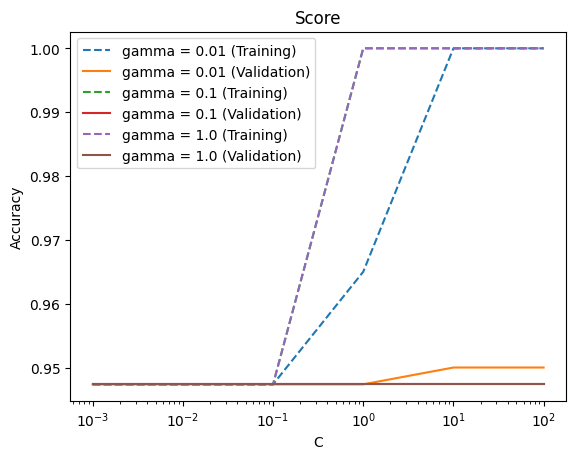

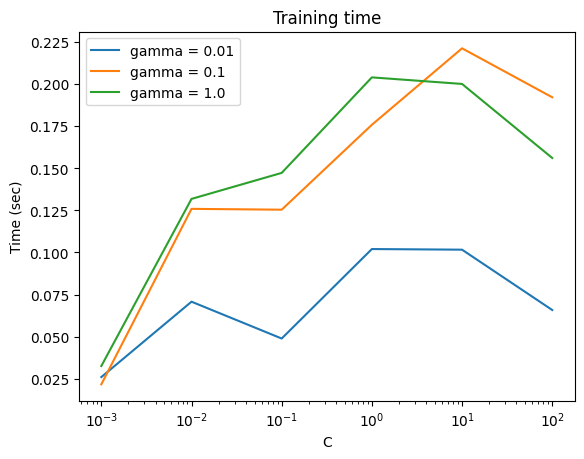

In [26]:
plot_grid_search(results, "C", "gamma", "log")

In [27]:
res = evaluate_model(
    "RBF SVM",
    model,
    results["best_params"],
    x_train_final,
    y_train_final,
    x_test_final,
    y_test_final,
)
final_results.append(res)

Training on the original training set with params = {'C': 10.0, 'gamma': 0.01}
Training time = 0.2 sec = 0.0 min
Training accuracy = 1.0
Test accuracy = 0.9031578947368422


##### Nearest Neighbors

In [28]:
from sklearn import neighbors

param_dict = {"n_neighbors": (1, 2, 5, 10), "p": (1, 2, 3)}

model = neighbors.KNeighborsClassifier()
results = grid_search(model, param_dict, x_train_final, y_train_final)

[1/12] {'n_neighbors': 1, 'p': 1}: train_acc = 1.0000, val_acc = 0.9421 | t = 0.0 sec = 0.0 min
[2/12] {'n_neighbors': 1, 'p': 2}: train_acc = 1.0000, val_acc = 0.9374 | t = 0.0 sec = 0.0 min
[3/12] {'n_neighbors': 1, 'p': 3}: train_acc = 1.0000, val_acc = 0.9326 | t = 0.0 sec = 0.0 min
[4/12] {'n_neighbors': 2, 'p': 1}: train_acc = 0.9518, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[5/12] {'n_neighbors': 2, 'p': 2}: train_acc = 0.9529, val_acc = 0.9463 | t = 0.0 sec = 0.0 min
[6/12] {'n_neighbors': 2, 'p': 3}: train_acc = 0.9520, val_acc = 0.9458 | t = 0.0 sec = 0.0 min
[7/12] {'n_neighbors': 5, 'p': 1}: train_acc = 0.9491, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[8/12] {'n_neighbors': 5, 'p': 2}: train_acc = 0.9509, val_acc = 0.9458 | t = 0.0 sec = 0.0 min
[9/12] {'n_neighbors': 5, 'p': 3}: train_acc = 0.9501, val_acc = 0.9463 | t = 0.0 sec = 0.0 min
[10/12] {'n_neighbors': 10, 'p': 1}: train_acc = 0.9474, val_acc = 0.9474 | t = 0.0 sec = 0.0 min
[11/12] {'n_neighbors': 10, 'p': 2}: t

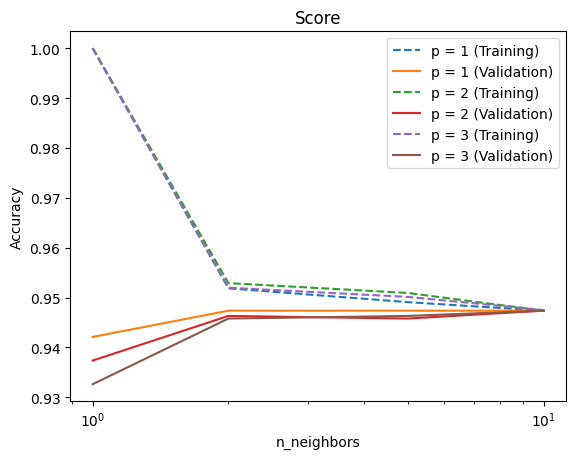

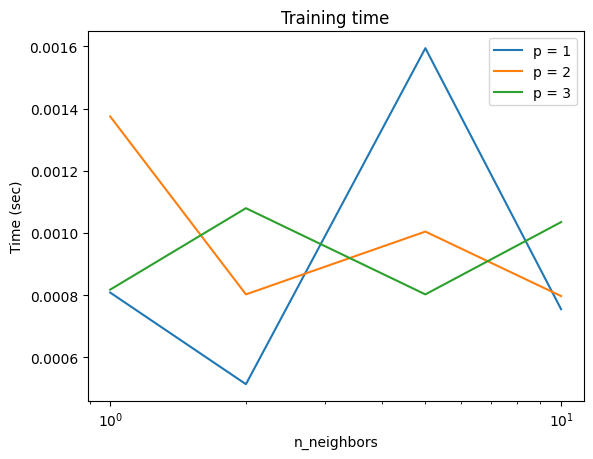

In [29]:
plot_grid_search(results, "n_neighbors", "p", "log")

In [30]:
res = evaluate_model(
    "Nearest Neighbors",
    model,
    results["best_params"],
    x_train_final,
    y_train_final,
    x_test_final,
    y_test_final,
)
final_results.append(res)

Training on the original training set with params = {'n_neighbors': 2, 'p': 1}
Training time = 0.0 sec = 0.0 min
Training accuracy = 0.9521052631578948
Test accuracy = 0.9010526315789473


##### Nearest Class Centroid

In [34]:
param_dict = {"shrink_threshold": (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)}

model = neighbors.NearestCentroid()
results = grid_search(model, param_dict, x_train_final, y_train_final)

[1/10] {'shrink_threshold': 0.1}: train_acc = 0.5964, val_acc = 0.5863 | t = 0.0 sec = 0.0 min
[2/10] {'shrink_threshold': 0.2}: train_acc = 0.5925, val_acc = 0.5795 | t = 0.0 sec = 0.0 min
[3/10] {'shrink_threshold': 0.3}: train_acc = 0.5879, val_acc = 0.5737 | t = 0.0 sec = 0.0 min
[4/10] {'shrink_threshold': 0.4}: train_acc = 0.5826, val_acc = 0.5721 | t = 0.0 sec = 0.0 min
[5/10] {'shrink_threshold': 0.5}: train_acc = 0.5786, val_acc = 0.5684 | t = 0.0 sec = 0.0 min
[6/10] {'shrink_threshold': 0.6}: train_acc = 0.5750, val_acc = 0.5658 | t = 0.0 sec = 0.0 min
[7/10] {'shrink_threshold': 0.7}: train_acc = 0.5711, val_acc = 0.5653 | t = 0.0 sec = 0.0 min
[8/10] {'shrink_threshold': 0.8}: train_acc = 0.5674, val_acc = 0.5611 | t = 0.0 sec = 0.0 min
[9/10] {'shrink_threshold': 0.9}: train_acc = 0.5653, val_acc = 0.5595 | t = 0.0 sec = 0.0 min
[10/10] {'shrink_threshold': 1.0}: train_acc = 0.5601, val_acc = 0.5579 | t = 0.0 sec = 0.0 min
Best params = {'shrink_threshold': 0.1}
Maximum v

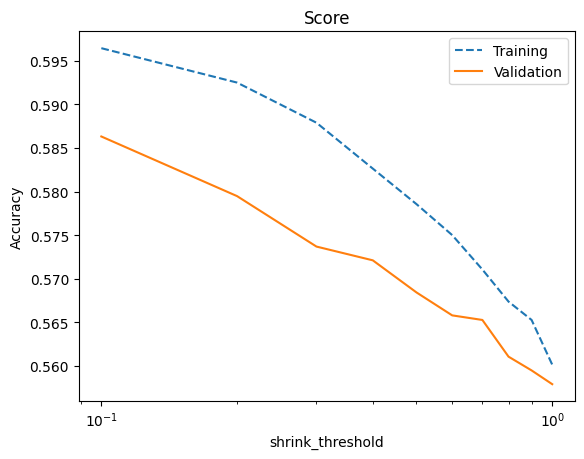

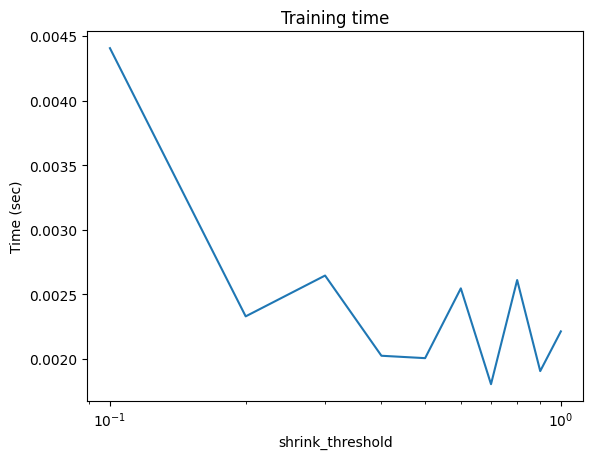

In [35]:
plot_grid_search(results, "shrink_threshold", None, "log")

In [36]:
res = evaluate_model(
    "Nearest Class Centroid",
    model,
    results["best_params"],
    x_train_final,
    y_train_final,
    x_test_final,
    y_test_final,
)
final_results.append(res)

Training on the original training set with params = {'shrink_threshold': 0.1}
Training time = 0.0 sec = 0.0 min
Training accuracy = 0.59
Test accuracy = 0.5010526315789474


#### Results summary

In [38]:
import pandas as pd

final_results_df = pd.DataFrame(final_results)
print(final_results_df)

               Classifier                   Parameters Training Accuracy  \
0           My Linear SVM                   C = 0.0010            0.9474   
1              Linear SVM                   C = 0.1000            0.9474   
2              My RBF SVM  C = 10.0000, gamma = 0.0100            1.0000   
3                 RBF SVM  C = 10.0000, gamma = 0.0100            1.0000   
4       Nearest Neighbors       n_neighbors = 2, p = 1            0.9521   
5  Nearest Class Centroid    shrink_threshold = 0.1000            0.5900   

  Test Accuracy Training Time (sec)  
0        0.8984                51.0  
1        0.8984                 0.1  
2        0.9032                42.9  
3        0.9032                 0.2  
4        0.9011                 0.0  
5        0.5011                 0.0  
